In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D


In [2]:
phone_data = pd.read_csv("C:\\Users\\konra\\OneDrive\\Pulpit\\telefony.csv", sep=',') 

In [ ]:
print(phone_data.shape)

In [3]:
X = phone_data.iloc[:, 0:20]

In [4]:
y = phone_data["price_range"]

In [5]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y.to_numpy().reshape(-1,1))
Y = enc.transform(y.to_numpy().reshape(-1,1)).toarray()

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy(), Y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

In [8]:
number_of_neurons=81
number_of_layers=61
n_min = 5
l_min= 5

In [ ]:
for n in range(n_min,number_of_neurons,5):
    for l in range(l_min,number_of_layers,5):
        model = tf.keras.Sequential()
        for x in range(l):
            model.add(tf.keras.layers.Dense(n, activation='relu', input_shape=(20,)))
        model.add(tf.keras.layers.Dense(4, activation='softmax'))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
        name="savedbest/"+"n"+str(n)+"l"+str(l)+".hdf5"
        checkpoint = ModelCheckpoint(name, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', period=1)
        history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test),callbacks=[checkpoint])

In [28]:
best_n=0
best_l=0
best_acc=0
best_m=0
i=0
r = {'n':[],'l':[],'acc':[],'loss':[],'val_acc':[],'val_loss':[],'m':[]}
results = pd.DataFrame(r)

for n in range(n_min,number_of_neurons,5):
    for l in range(l_min,number_of_layers,5):
        name="savedbest/"+"n"+str(n)+"l"+str(l)+".hdf5"
        model2 = load_model(name)
        eva_test = model2.evaluate(X_test, Y_test)
        val_acc=eva_test[1]
        val_loss=eva_test[0]
        
        eva_train = model2.evaluate(X_train, Y_train)
        acc=eva_train[1]
        loss=eva_train[0]
        
        m=(val_acc*acc)/(0.5+val_loss+loss)
        
        results.loc[i,:]=[n,l,acc,loss,val_acc,val_loss,m]
        i+=1
        if m > best_m:
            best_m = m
            best_n = n
            best_l = l

50/50 [==============================] - 1s 3ms/step - loss: 1.3862 - accuracy: 0.2525


50/50 [==============================] - 1s 3ms/step - loss: 0.1118 - accuracy: 0.9681


50/50 [==============================] - 1s 5ms/step - loss: 0.0906 - accuracy: 0.9725


50/50 [==============================] - 1s 5ms/step - loss: 0.1014 - accuracy: 0.9794


50/50 [==============================] - 1s 6ms/step - loss: 1.3862 - accuracy: 0.2525


In [29]:
name="savedbest/"+"n"+str(best_n)+"l"+str(best_l)+".hdf5"

In [30]:
model3 = load_model(name)

In [31]:
model3.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.9750


[0.08428072929382324, 0.9750000238418579]

In [32]:
model3.evaluate(X_train, Y_train)

50/50 [==============================] - 0s 2ms/step - loss: 0.0730 - accuracy: 0.9800


[0.07298775762319565, 0.9800000190734863]

In [36]:
results

,n,l,acc,loss,val_acc,val_loss,m
0,5.0,5.0,0.704375,0.665407,0.7175,0.684274,0.273230
1,5.0,10.0,0.958125,0.171689,0.9675,0.180329,1.087988
2,5.0,15.0,0.967500,0.093585,0.9725,0.093655,1.369091
3,5.0,20.0,0.973125,0.123438,0.9800,0.123143,1.277373
4,5.0,25.0,0.252500,1.386311,0.2400,1.386250,0.018518
...,...,...,...,...,...,...,...
187,80.0,40.0,0.979375,0.101423,0.9700,0.117709,1.321027
188,80.0,45.0,0.970000,0.102041,0.9625,0.120087,1.292880
189,80.0,50.0,0.962500,0.108388,0.9650,0.120426,1.274416
190,80.0,55.0,0.252500,1.386240,0.2400,1.386568,0.018516


In [39]:
best_l

15

In [52]:
results = results.drop(results[results.val_acc < 0.9].index)
results = results.drop(results[results.acc < 0.9].index)
results = results.drop(results[results.loss > 0.1].index)
results = results.drop(results[results.val_loss > 0.1].index)

C:\Users\konra\AppData\Local\Temp/ipykernel_7672/2988068261.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure().gca(projection='3d')


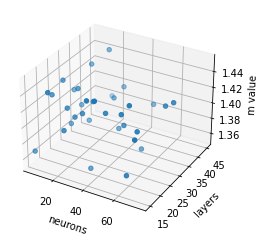

In [54]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(results['n'], results['l'], results['m'])
threedee.set_xlabel('neurons')
threedee.set_ylabel('layers')
threedee.set_zlabel('m value')
plt.show()

In [60]:
results = results.drop(results[results.m < 1.42].index)

In [61]:
results

,n,l,acc,loss,val_acc,val_loss,m
15,10.0,20.0,0.973125,0.083191,0.9825,0.084577,1.431778
16,10.0,25.0,0.975625,0.079563,0.9775,0.083042,1.439280
26,15.0,15.0,0.976875,0.076809,0.9775,0.082704,1.447880
30,15.0,35.0,0.981250,0.074036,0.9725,0.088025,1.441356
39,20.0,20.0,0.971875,0.078008,0.9750,0.089027,1.420584
40,20.0,25.0,0.973750,0.085136,0.9850,0.083669,1.434116
43,20.0,40.0,0.979375,0.070038,0.9725,0.085965,1.451887
64,30.0,25.0,0.976875,0.078310,0.9750,0.090972,1.423098
86,40.0,15.0,0.976875,0.073785,0.9750,0.082460,1.451367
98,45.0,15.0,0.980000,0.072988,0.9750,0.084281,1.453744


In [62]:
model3.save('najlepszymodel/098_0975_n45l15.hdf5')

In [65]:
model4 = load_model('najlepszymodel/098_0975_n45l15.hdf5')

In [67]:
model4.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.0843 - accuracy: 0.9750


[0.08428072929382324, 0.9750000238418579]